In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt

In [2]:
courses_df = pd.read_csv('courses.csv')

In [3]:
courses_df.head(5)

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,NaN,21,4217.0,50.646827,Coursera,38.797425,NaN
1,2,Course_2,Office Tools,57,4238.0,82.240240,edX,NaN,3.829329
2,3,Course_3,NaN,52,NaN,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308.0,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792.0,NaN,Udemy,96.246696,4.921968


In [4]:

numerical_columns = ['Duration (hours)', 'Enrolled_Students', 'Completion_Rate (%)', 'Price ($)', 'Rating (out of 5)']
for col in numerical_columns:
    mean_value = courses_df[col].mean()
    courses_df[col] = courses_df[col].fillna(mean_value)

non_numerical_columns = ['Course_Name', 'Category', 'Platform']
courses_df[non_numerical_columns] = courses_df[non_numerical_columns].ffill()

In [5]:
courses_df['Category'] = courses_df['Category'].ffill()

In [6]:
courses_df.isnull().sum()

Course_ID              0
Course_Name            0
Category               1
Duration (hours)       0
Enrolled_Students      0
Completion_Rate (%)    0
Platform               0
Price ($)              0
Rating (out of 5)      0
dtype: int64

In [7]:
courses_df.duplicated().sum()

np.int64(0)

In [8]:
courses_df.describe()

,Course_ID,Duration (hours),Enrolled_Students,Completion_Rate (%),Price ($),Rating (out of 5)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,55.144000,2530.764553,75.124982,106.385209,3.994135
std,2886.89568,26.199242,1423.749270,14.456856,55.090366,0.575393
min,1.00000,10.000000,101.000000,50.008183,10.037145,3.000026
25%,2500.75000,32.000000,1289.750000,62.640421,58.631764,3.490348
50%,5000.50000,55.000000,2531.500000,75.153940,107.960928,4.002543
75%,7500.25000,78.000000,3764.000000,87.590200,153.929018,4.483539
max,10000.00000,100.000000,5000.000000,99.994300,199.962412,4.999176


In [9]:
courses_df.head(30)

,Course_ID,Course_Name,Category,Duration (hours),Enrolled_Students,Completion_Rate (%),Platform,Price ($),Rating (out of 5)
0,1,Course_1,NaN,21,4217.000000,50.646827,Coursera,38.797425,3.994135
1,2,Course_2,Office Tools,57,4238.000000,82.240240,edX,106.385209,3.829329
2,3,Course_3,Office Tools,52,2530.764553,55.729028,LinkedIn Learning,123.503781,4.851950
3,4,Course_4,Office Tools,69,4308.000000,58.664729,LinkedIn Learning,116.775704,3.913732
4,5,Course_5,Technology,43,4792.000000,75.124982,Udemy,96.246696,4.921968
5,6,Course_6,Finance,66,3792.000000,96.671900,edX,127.509920,3.252283
6,7,Course_7,Marketing,29,2607.000000,71.830441,Coursera,155.541117,4.101807
7,8,Course_8,Design,21,964.000000,99.076272,edX,79.940944,3.088730
8,9,Course_9,Programming,57,2530.764553,78.817622,LinkedIn Learning,106.385209,4.498471
9,10,Course_10,Design,59,489.000000,58.896068,edX,82.094819,3.341868


In [10]:
courses_df.rename(columns={
    'Price ($)': 'Price',
    'Completion_Rate (%)': 'Completion_Rate',
    'Rating (out of 5)': 'Rating'
}, inplace=True)

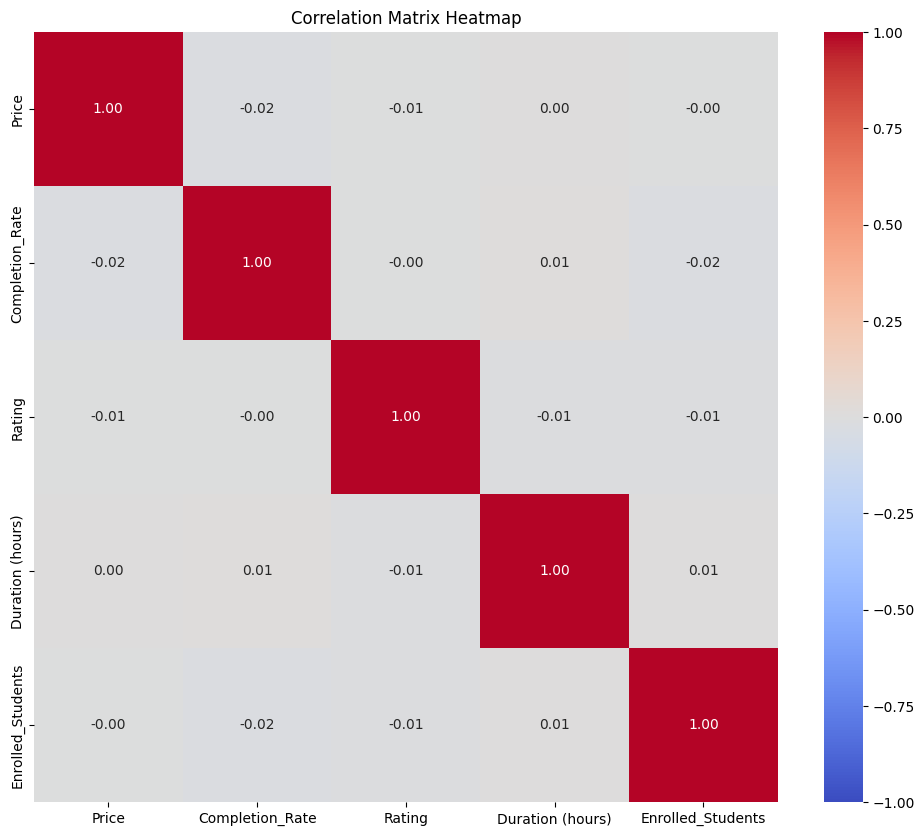

In [11]:
features = ['Price', 'Completion_Rate', 'Rating', 'Duration (hours)', 'Enrolled_Students']

correlation_matrix = courses_df[features].corr()

plt.figure(figsize=(12, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [12]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

## Histplot

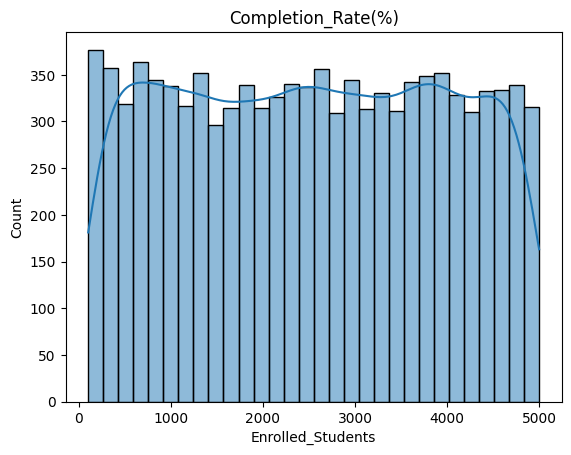

In [13]:
sns.histplot(courses_df['Enrolled_Students'], bins=30, kde=True)
plt.title('Completion_Rate(%)')
plt.show()

## horizontal bar chart

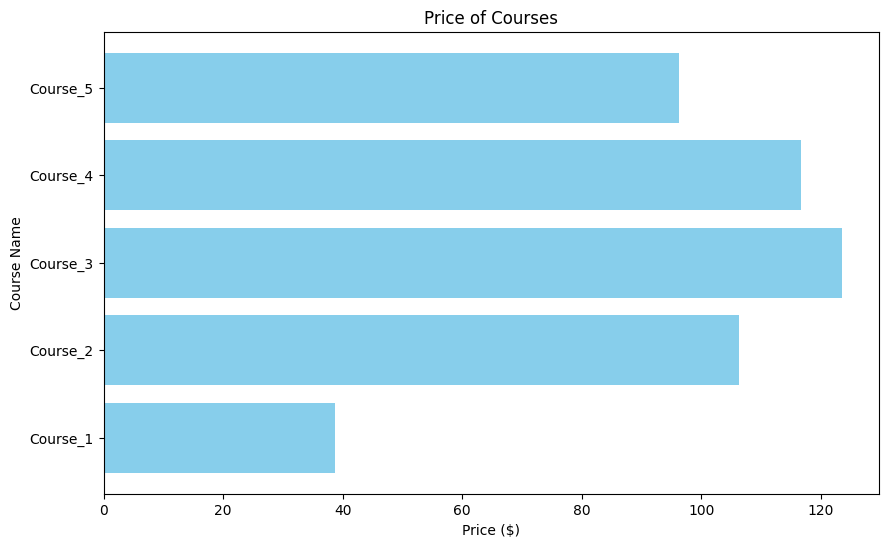

In [16]:
course_names = courses_df['Course_Name'][:5].astype(str)  
prices = courses_df['Price'][:5]

plt.figure(figsize=(10, 6))
plt.barh(course_names, prices, color='skyblue')
plt.xlabel('Price ($)')
plt.ylabel('Course Name')
plt.title('Price of Courses')
plt.show()

## Scatterplot

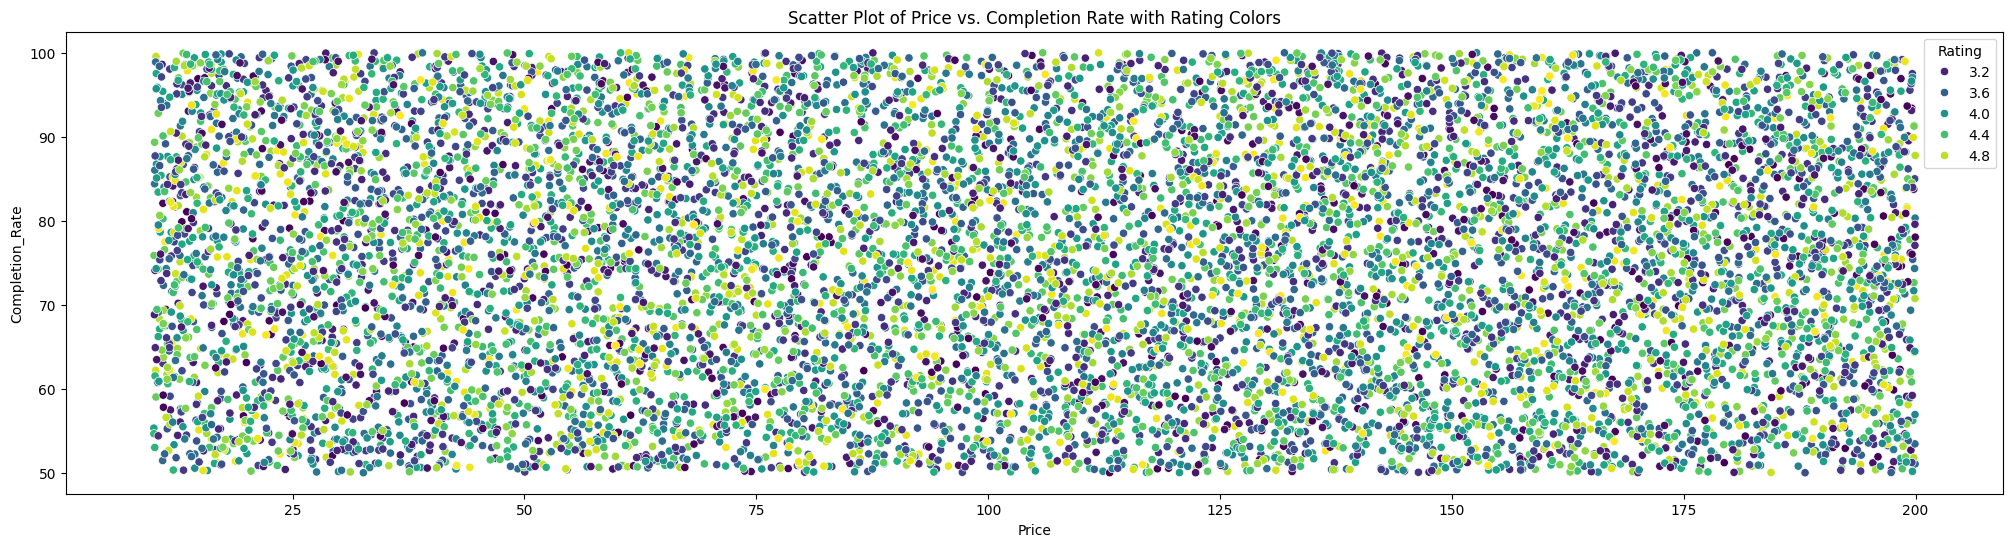

In [22]:
plt.figure(figsize=(25, 6))
sns.scatterplot(x='Price', y='Completion_Rate', hue='Rating', palette='viridis', data=courses_df)
plt.title('Scatter Plot of Price vs. Completion Rate with Rating Colors')
plt.show()

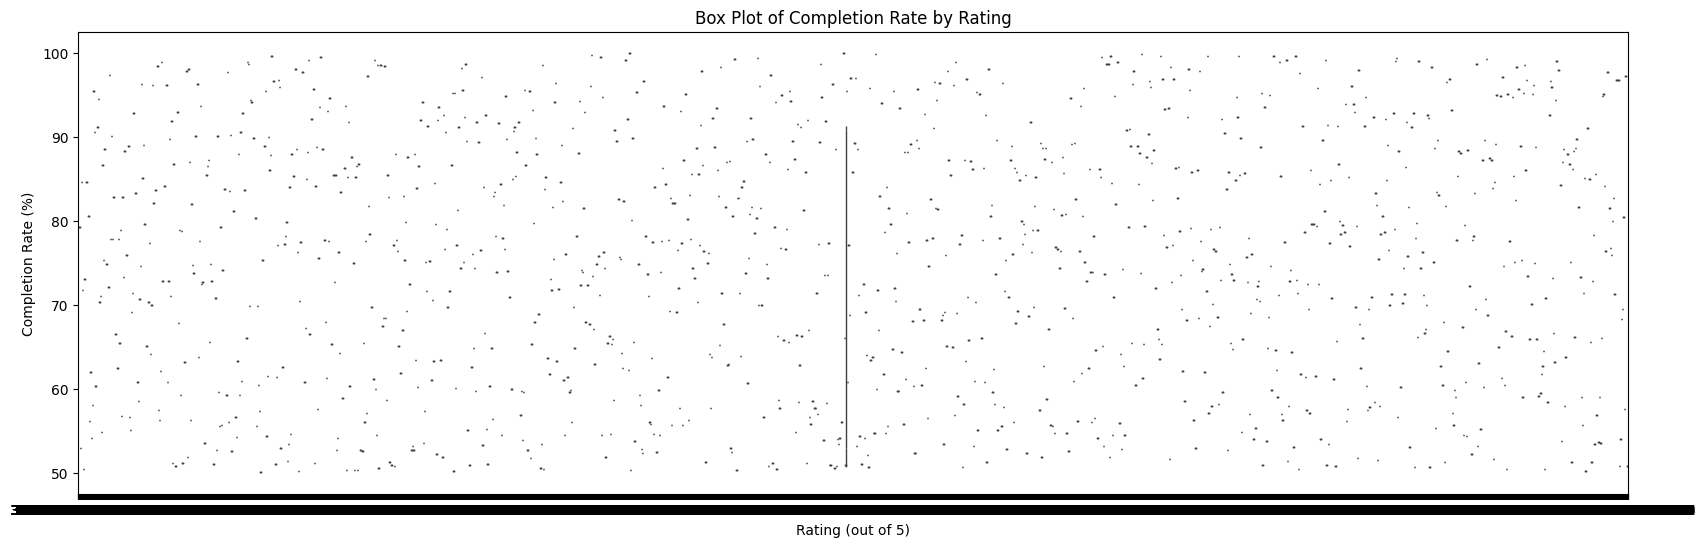

In [23]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Rating', y='Completion_Rate', data=courses_df)
plt.title('Box Plot of Completion Rate by Rating')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Completion Rate (%)')
plt.show()

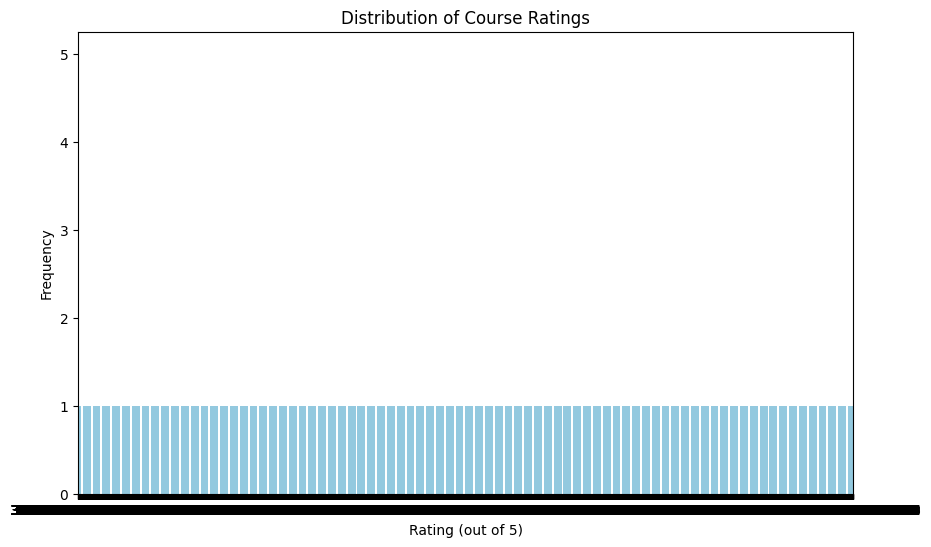

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=courses_df, color='skyblue')
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating (out of 5)')
plt.ylabel('Frequency')
plt.show()

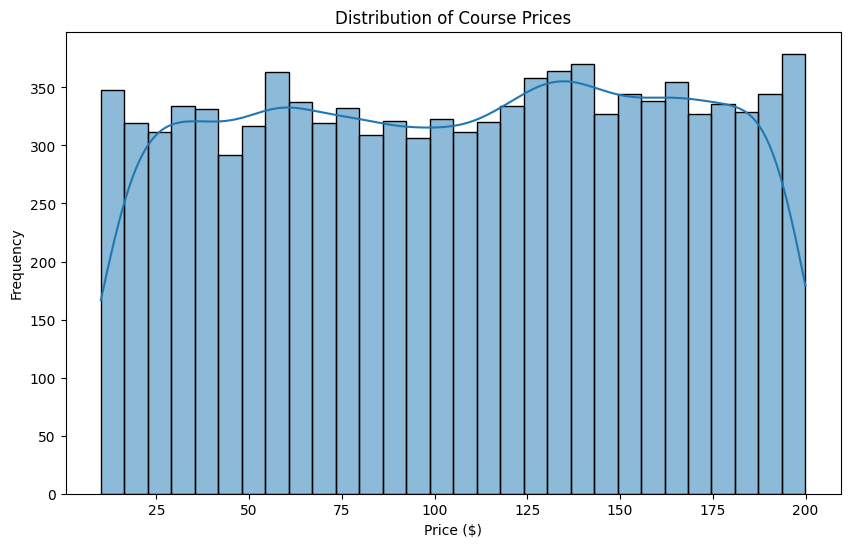

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(courses_df['Price'], bins=30, kde=True)
plt.title('Distribution of Course Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()